In [31]:
import data_import
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.ndimage.filters import gaussian_filter


plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))

In [32]:
def exec(dt=1e-2, output_dt=1e-1, tf=60*3, vz=3, nh=10, entityAp=2000, zombieAp=2000):

    command = f"java -cp target/Zombies-1.0.jar \
                -Ddt={dt} -DoutputDt={output_dt} -Dtf={tf} \
                -Dvz={vz} -Dnh={nh} \
                -DentityAp={entityAp} -DzombieAp={zombieAp} \
                Main"
    proc = os.popen(command)
    proc.readlines()
    proc.close()
    data = data_import.Data("zombies.txt")
    return data


In [33]:
results = {}
NH = 100
iterations = 3
#Ap = np.linspace(0, 2000, 10)
proportion = np.arange(0, 1.1, 0.1)
ZAp = [500, 2000, 4000]

if os.path.isfile("results.pickle"):
    results = pickle.load(open("results.pickle", "rb"))
else:

    for zap in ZAp:
        res_p = {}
        for p in proportion:
            res_iterations = {}
            for iteration in range(iterations):
                data = exec(nh=NH, dt=1e-2, output_dt=1,
                            entityAp=zap*p, zombieAp=zap, tf=60)
                time = []
                zcount = []
                res = {}
                for t, z, h, data in data:
                    time.append(t)
                    zcount.append(z)
                res["time"] = time
                res["zcount"] = zcount
                res_iterations[iteration] = res
            res_p[p] = res_iterations
        results[zap] = res_p


KeyboardInterrupt: 

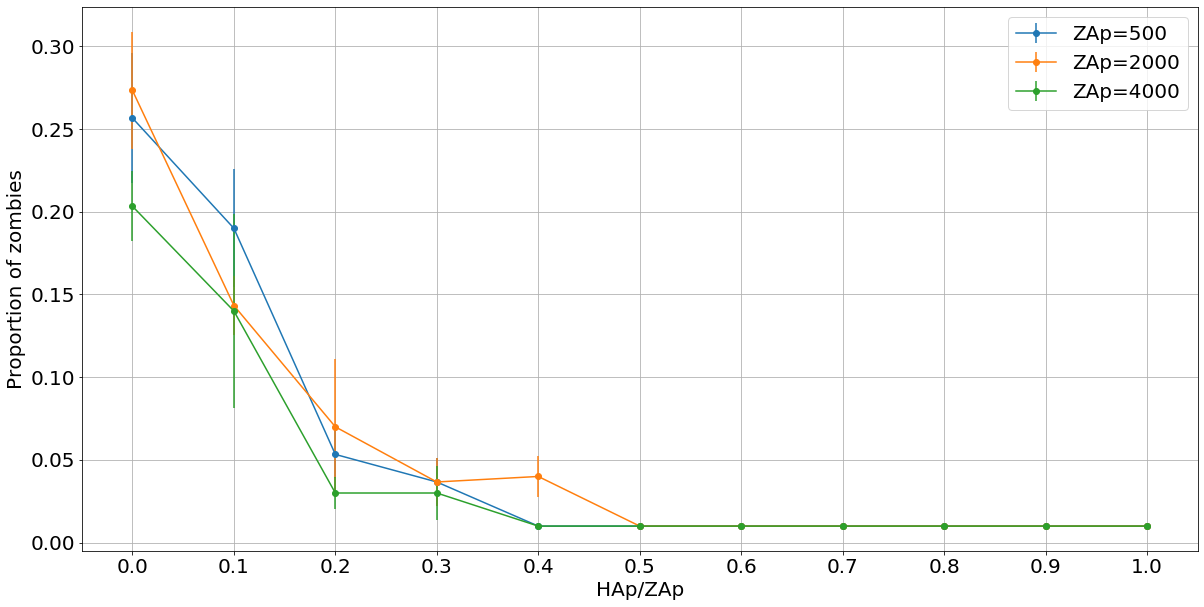

In [ ]:
for zap in ZAp:
    means = []
    errors = []
    res_p = results[zap]
    for p in proportion:
        res = res_p[p]
        values = []
        for iteration in res:
            values.append(res[iteration]["zcount"][-1]/NH)
        means.append(np.mean(values))
        errors.append(np.std(values)/np.sqrt(len(values)))
    plt.errorbar(proportion, means, yerr=errors, fmt="o-", label=f"ZAp={zap}")
plt.legend()
plt.ylabel("Proportion of zombies")
plt.xlabel("HAp/ZAp")
plt.xticks(proportion)
plt.grid()
plt.show()

In [ ]:
pickle.dump(results, open("results.pickle", "wb"))